## Context
**Methane has been identified as a major contributor to the rise in global temperatures since the Industrial Revolution, accounting for approximately 30% of the increase. In order to mitigate the effects of global warming and improve air quality, it is crucial to implement swift and consistent measures to reduce methane emissions. Notably, the energy sector, encompassing oil, natural gas, coal, and bioenergy, is responsible for almost 40% of human-caused methane emissions. As such, reducing methane emissions in the energy sector represents a critical step towards achieving our climate goals.**

https://iea.blob.core.windows.net/assets/48ea967f-ff56-40c6-a85d-29294357d1f1/GlobalMethaneTracker_Documentation.pdf

## Content
The following dataset has information about methane gas emissions globally. Details about the columns are as follows:

- region 
- country - Country of Emission.
- emissions - Methane Emissions in kilotons (kt).
- type - Sector from which emissions occur.
- Segment- Sub-sector from which emissions occur.
- reason - The reason for the emission.
- baseYear - Base year for the tracking of emissions.
- notes - The source of data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read The CSV File

df = pd.read_csv("Methane_final.csv", index_col=0)

In [3]:
# Let's Look Starting 5 Rows

df.head(2)

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...


In [4]:
# Let's See The Summary of The DataFrame.

df.info()

# Here We Have 1548 Rows With 8 Columns
# We Can Able to See The Dtype of Each Column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     1548 non-null   object 
 1   country    1548 non-null   object 
 2   emissions  1548 non-null   float64
 3   type       1548 non-null   object 
 4   segment    1548 non-null   object 
 5   reason     1548 non-null   object 
 6   baseYear   1548 non-null   object 
 7   notes      1548 non-null   object 
dtypes: float64(1), object(7)
memory usage: 108.8+ KB


In [5]:
# Since We Are Working On 2022 Methane Emissions we can remove "baseYear" year.

# https://iea.blob.core.windows.net/assets/48ea967f-ff56-40c6-a85d-29294357d1f1/GlobalMethaneTracker_Documentation.pdf

df.drop(columns="baseYear", inplace=True)

In [6]:
# Let's Analyse "notes" column. Do We Suppose To Use NLP or Any Other Technique To Get Inside..?

print(f"In notes Column We Have {df['notes'].nunique()} Unique Entries")
df.notes.value_counts()

In notes Column We Have 3 Unique Entries


Not available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [7]:
# In "notes" column The Information is About The Source, So Let's Drop The Column

df.drop(columns="notes", inplace=True)

In [8]:
# Let's See Which All Region is Covered In This Dataset.

df["region"].unique()

# By Seeing This We Can Say The Dataset is Representing World Information. 

array(['Africa', 'Asia Pacific', 'Central and South America', 'Europe',
       'Middle East', 'North America', 'Other', 'Russia & Caspian',
       'World'], dtype=object)

In [9]:
# The United Nations currently recognizes 193 member states as countries.
# Let's See How Many Countries Are Being Covered in This Dataset.

print(f"This Dataset is representing {df['country'].nunique()} Unique Countries")
df["country"].unique()

This Dataset is representing 105 Unique Countries


array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', "Cote d'Ivoire",
       'Democratic Republic of Congo', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Liberia', 'Libya', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Australia',
       'Bangladesh', 'Brunei', 'China', 'India', 'Indonesia', 'Japan',
       'Korea', 'Malaysia', 'Mongolia', 'New Zealand',
       'Other countries in Southeast Asia', 'Pakistan', 'Philippines',
       'Thailand', 'Vietnam', 'Argentina', 'Bolivia', 'Brazil',
       'Colombia', 'Cuba', 'Ecuador', 'Guyana', 'Paraguay', 'Peru',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela', 'Denmark',
       'Estonia', 'European Union', 'France', 'Germany', 'Israel',
      

In [10]:
# In 105 Countries Some Small Countries Are Represented As A Group.

for index, item in df["country"].value_counts().iteritems():
    if index.startswith("Other") or index.startswith("World"):
        print(index, item)
    

World 22
Other EU17 countries 22
Other 21
Other countries in Europe 18
Other countries in Southeast Asia 17
Other EU7 countries 16


### Sector wise analysis

**Energy sector**: Methane is released during the production, processing, transportation, and distribution of fossil fuels such as coal, oil, and natural gas.

**Agriculture sector**: Methane is produced during enteric fermentation in ruminant animals like cows and sheep, as well as during manure management and rice cultivation.

**Landfills and waste sector**: Methane is generated during the decomposition of organic waste in landfills and wastewater treatment facilities.

**Industrial processes**: Methane is emitted during the production of chemicals, metals, and other products.

**Natural sources**: Methane is also emitted from natural sources such as wetlands, lakes, and oceans.

In [11]:
# Unique Sectors

df["type"].unique()

array(['Agriculture', 'Energy', 'Other', 'Waste'], dtype=object)

In [12]:
# Let's get Worldwide Data

dfw = df[df["country"]=="World"]

# Remove World Data From df.
df = df[df["country"]!="World"]

In [13]:
# Counts of Each Sectors

df["type"].value_counts()

Energy         1214
Agriculture     104
Other           104
Waste           104
Name: type, dtype: int64

In [14]:
# Which Sector is Producing How Much Methane World Wide.

sector_wise = df[df["segment"]=="Total"].groupby("type")["emissions"].sum()
sector_wise

type
Agriculture    150805.103144
Energy         135347.173195
Other           10028.772862
Waste           75079.707008
Name: emissions, dtype: float64

In [15]:
# There is Some Error In World Wide Information.

sector_wise_w = dfw[dfw["segment"]=="Total"].groupby("type")["emissions"].sum()
sector_wise_w

type
Agriculture    141953.765625
Energy         133350.984375
Other            9737.874023
Waste           70758.710938
Name: emissions, dtype: float64

In [16]:
# Let's See The Error.
# Erroe = ((sector_wise-sector_wise_w)/sector_wise_w)*100

round(((sector_wise-sector_wise_w)/sector_wise_w), 5).map('{:.2%}'.format)

type
Agriculture    6.24%
Energy         1.50%
Other          2.99%
Waste          6.11%
Name: emissions, dtype: object

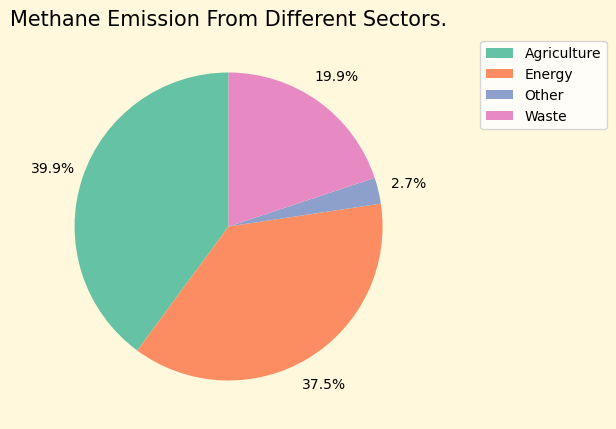

In [17]:
# Let's use Information From Dataset.
# Let's Plot Methane Emission Sector wise.


cmap = plt.get_cmap('Set2')

plt.figure(figsize=(10, 5), facecolor="cornsilk")
plt.pie(sector_wise_w, 
        autopct="%1.1f%%",
        pctdistance=1.2,
        startangle=90,
        colors=cmap(np.arange(len(sector_wise_w))))
plt.title('Methane Emission From Different Sectors.', fontsize=15, loc="center")
plt.legend(labels=sector_wise_w.index,
          bbox_to_anchor=(1, 0.5, 0.5, 0.5))

plt.savefig('Methane Emission Sector wise.png', dpi=300, bbox_inches="tight", pad_inches=0.3)
plt.show()


***The pie chart "Methane Emission From Different Sectors" shows the distribution of methane emissions from four sectors: agriculture, energy, waste, and other.***
From the chart, we can see that agriculture is the largest contributor to methane emissions, accounting for approximately 42% of the total emissions. The energy sector is the second-largest contributor, with around 39% of total emissions. Waste and other sectors contribute to around 12% and 7% of the total emissions, respectively.

This data highlights the need for more attention and action to reduce methane emissions from the agriculture and energy sectors, as they account for the majority of the emissions. The waste and other sectors may also require targeted solutions, but reducing emissions from agriculture and energy should be the primary focus.

**Overall, this pie chart provides a clear visual representation of the relative contributions of each sector to methane emissions and can be used to inform policy and action to reduce emissions in the future.**

In [18]:
# Energy Sector Has Segments, Let's See Which Segment Produces How Much Methane.

segment_wise = df[df["segment"]!="Total"].groupby("segment")["emissions"].sum()
segment_wise

segment
Bioenergy                                          9926.408038
Coking coal                                       10313.157684
Gas pipelines and LNG facilities                  12639.023727
Offshore gas                                       4342.396777
Offshore oil                                       8349.611860
Onshore gas                                       18097.597573
Onshore oil                                       34332.783240
Other from coal                                    1699.342014
Other from oil and gas                             2493.177699
Satellite-detected large oil and gas emissions     3106.400007
Steam coal                                        30047.273344
Name: emissions, dtype: float64

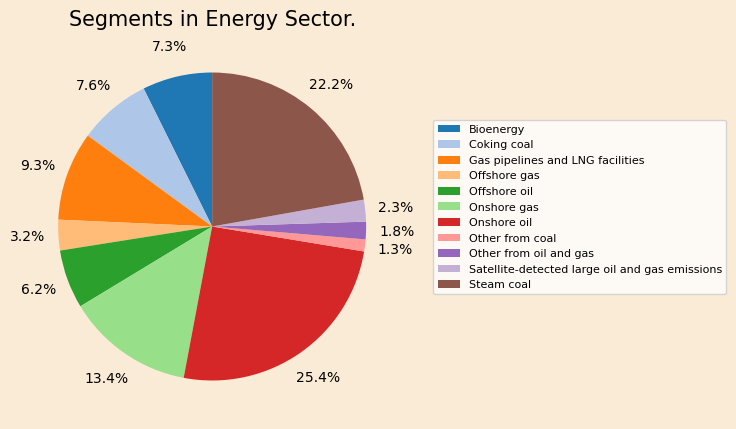

In [19]:
# Let's Plot Methane Emission In Different Entergy Sector.

cmap = plt.get_cmap('tab20')


plt.figure(figsize=(10, 5), facecolor="antiquewhite")
plt.pie(segment_wise,
        autopct="%1.1f%%",
        pctdistance=1.2,
        startangle=90,
        colors=cmap(np.arange(len(segment_wise))),
         )
plt.title('Segments in Energy Sector.', 
          fontsize=15, 
          loc="center")
plt.legend(segment_wise.index, 
           loc="right", 
           fontsize=8, 
           bbox_to_anchor=(1.6, 0.3, 0.25, 0.5))
plt.savefig('Methane Emission In Different Energy Sector.png', dpi=300, bbox_inches="tight", pad_inches=0.3)
plt.show()

***The pie chart "Segments in Energy Sector" shows the distribution of methane emissions in the energy sector across various segments. From the chart, we can see that Onshore oil, Steam coal, and Gas pipelines and LNG facilities are the top three contributors to methane emissions in the energy sector.***

**To reduce methane emissions in the energy sector, some potential actions could be:**

- Increase investment in renewable energy sources such as wind, solar, and hydroelectric power to reduce the reliance on fossil fuels.

- Improve the efficiency of energy production and consumption to reduce the amount of fossil fuels used.

- Develop and implement stricter regulations on methane emissions for the energy sector.

- Increase the use of carbon capture and storage technologies to reduce the amount of methane released into the atmosphere.

- Encourage the adoption of best practices for methane management, including regular maintenance of equipment, proper handling of waste, and monitoring of emissions.

**Overall, reducing methane emissions in the energy sector will require a combination of efforts from governments, businesses, and individuals to transition to cleaner and more sustainable energy sources while improving the management of fossil fuel operations.**

### Region wise analysis.

Methane emissions are closely related to population growth, and different regions of the world are experiencing different levels of population growth. As population increases, so does the demand for food and energy, which are two of the main sources of methane emissions. Therefore, it is likely that methane emissions will increase as the global population continues to grow. However, the impact of population growth on methane emissions will vary by region, depending on factors such as the level of industrialization, the composition of the energy mix, and the intensity of agricultural production. It is important to monitor methane emissions by region to understand how different factors contribute to their production and to implement targeted measures to reduce emissions in the most affected regions. By doing so, we can mitigate the impact of methane emissions on the environment and human health.

Here is the population distribution.
- Africa: 17.66%
- Asia Pacific: 60.47%
- Central and South America: 8.65%
- Europe: 7.33%
- Middle East: 3.93%
- North America: 4.52%
- Other: 0.44%
- Russia & Caspian: 1.00%

Let's analyze how methane emission is distributed around the world.

In [20]:
dft = df[df["segment"]=="Total"]

In [21]:
region_emiss = dft.groupby("region")["emissions"].sum().sort_values(ascending=False)
region_emiss

region
Asia Pacific                 136079.525927
North America                 42448.051056
Europe                        42326.519342
Africa                        40929.213518
Central and South America     38316.827054
Russia & Caspian              35758.755358
Middle East                   21825.386844
Other                         13576.477112
Name: emissions, dtype: float64

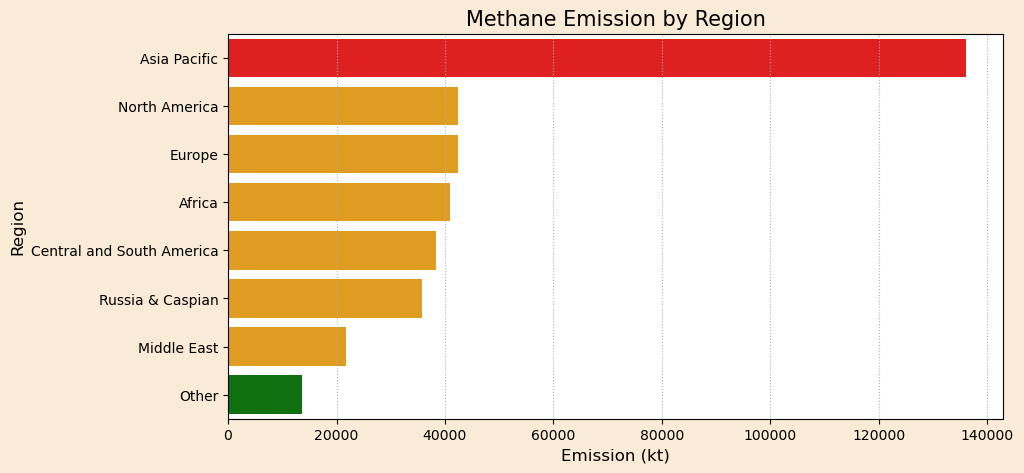

In [22]:
# Let's Plot Methane Emission Region wise.

colors = ['green' if val == region_emiss.min() else 'red' if val == region_emiss.max() else 'orange' for val in region_emiss]

plt.figure(figsize=(10, 5), facecolor="antiquewhite")
sns.barplot(x=region_emiss.values, y=region_emiss.index, palette=colors)
plt.title('Methane Emission by Region', fontsize=15)
plt.xlabel('Emission (kt)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis="x", linestyle=":")

plt.savefig('Methane Emission Region wise.png', dpi=300, bbox_inches="tight", pad_inches=0.3)
plt.show()

**From the bar chart "Methane Emission by Region," we can observe that the highest methane emissions are from the Asia Pacific region, followed by North America and Europe. The least emissions are from the Other category.**

**To understand how to overcome this situation, we need to consider the different sectors that contribute to methane emissions. The agriculture sector is a significant contributor to methane emissions, and we can explore ways to reduce emissions from livestock and rice farming.**
**In the energy sector, we can focus on reducing emissions from fossil fuel production, which is a significant contributor to methane emissions. We can encourage the adoption of cleaner sources of energy like renewable energy and improve the efficiency of existing energy infrastructure.**
**To reduce emissions from the Other category, we can explore ways to reduce emissions from landfills, which are a significant source of methane emissions. We can also focus on reducing emissions from wastewater treatment and other industrial activities.**

**Overall, reducing methane emissions will require a coordinated effort from different sectors and countries. It will require a combination of policies, incentives, and technological solutions to achieve significant emissions reductions.**

### Country wise analysis.
Country-wise analysis of methane emissions provides insights into the major contributors to global methane emissions and helps in formulating strategies to reduce these emissions. The analysis includes the identification of the top methane-emitting countries, which are often the largest emitters of other greenhouse gases as well. It also helps in understanding the trends in methane emissions across different regions, which can be useful for policy-making and monitoring progress towards climate change targets.

In [23]:
country_emiss = dft.groupby("country")["emissions"].sum().sort_values()
country_emiss

country
Seychelles           2.621898
Liberia             43.897755
Gambia              47.587691
Brunei              54.243037
Slovenia            75.660512
                     ...     
Brazil           19964.342743
Russia           24354.845947
India            29666.771362
United States    31835.246887
China            55676.149292
Name: emissions, Length: 104, dtype: float64

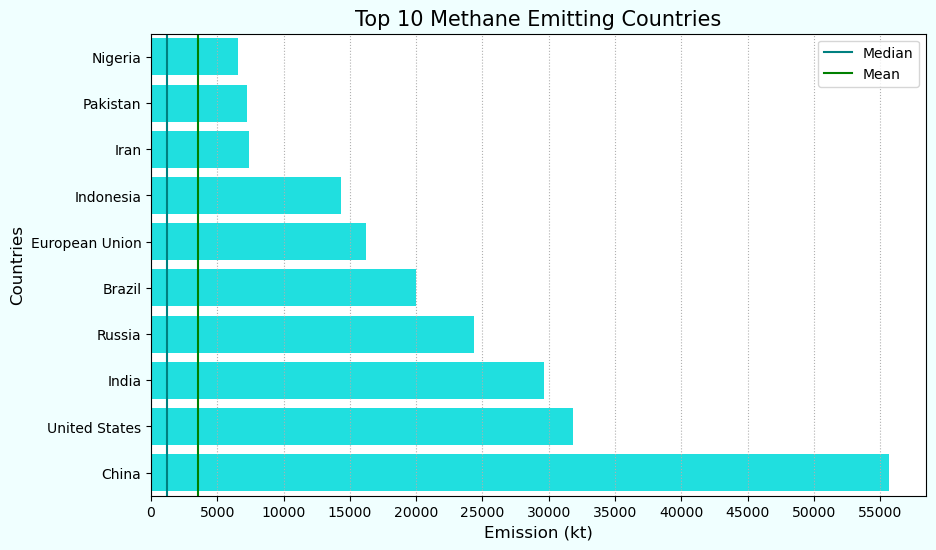

In [24]:
# Let's Plot Top 10 Methane Emitting countries.

x = country_emiss[country_emiss.index!="Other"][-10:]

plt.figure(figsize=(10, 6), facecolor="azure")
sns.barplot(x=x[-10:].values, y=x[-10:].index, color="cyan")
plt.title('Top 10 Methane Emitting Countries', fontsize=15)
plt.xlabel('Emission (kt)', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.grid(axis="x", linestyle=":")

plt.axvline(round(country_emiss.median()), label="Median", c="teal")
plt.axvline(round(country_emiss.mean()), label="Mean", c="green")

plt.legend(fontsize=10)
plt.xticks(range(0,60000, 5000))

plt.savefig('Top 10 Methane Emitting countries.png', dpi=300, bbox_inches="tight", pad_inches=0.3)
plt.show()

***When looking at the "Top 10 Methane Emitting Countries" pie chart, it is clear that China, the United States, and India are the largest methane emitters by far, with the rest of the top 10 countries trailing significantly behind. This highlights the fact that reducing methane emissions will require global cooperation and commitment.***

**To overcome this problem, there are several points that can be considered:**

- *Improved regulation and monitoring of methane emissions in the energy and agriculture sectors can help to identify and address sources of methane emissions.*
- *Investment in renewable energy sources such as solar and wind can help to reduce the reliance on fossil fuels, which are a significant contributor to methane emissions.*
- *Changes to agricultural practices, such as reducing the use of fertilizers and implementing more sustainable land use practices, can also help to reduce methane emissions from the agriculture sector.*
- *Encouraging the adoption of technologies that can capture and utilize methane, such as biogas digesters, can help to reduce methane emissions while also providing a source of renewable energy.*
- *Overall, reducing methane emissions will require a concerted effort from governments, businesses, and individuals worldwide to make meaningful progress towards a more sustainable future.*

### Reducing emissions can involve various strategies depending on the sector and specific emissions source. Here are some general ways to reduce emissions from the sectors mentioned in your pie charts:

- **Agriculture:**
Implementing sustainable farming practices such as crop rotation, conservation tillage, and cover crops to reduce greenhouse gas emissions from fertilizer use and soil management. Reducing food waste by improving storage, transportation, and distribution systems. Encouraging the adoption of plant-based diets to reduce emissions from livestock farming.
- **Energy:**
Transitioning to cleaner energy sources such as wind, solar, and hydro power. Improving energy efficiency in buildings and industrial processes to reduce energy demand and emissions. Implementing carbon capture and storage technologies to capture and store emissions from fossil fuel combustion.
- **Waste:**
Reducing waste generation through recycling, composting, and waste reduction strategies. Capturing and utilizing methane emissions from landfills as an energy source. 

***Overall, reducing emissions requires a combination of individual and collective actions. Governments, businesses, and individuals all have a role to play in reducing emissions and addressing climate change.***

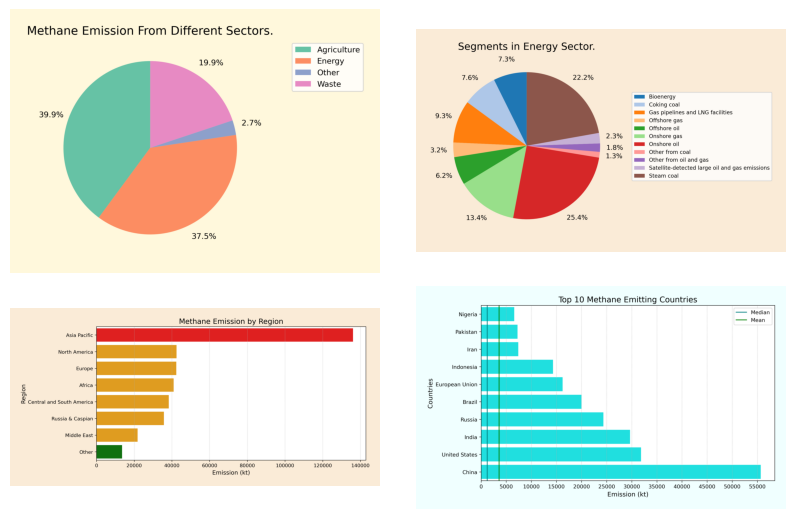

In [25]:
# create a list of image paths
image_paths = ['Methane Emission Sector wise.png', 
               'Methane Emission In Different Energy Sector.png', 
               'Methane Emission Region wise.png', 
               'Top 10 Methane Emitting countries.png']

# create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.subplots_adjust(wspace=0.1, hspace=-0.5)
# iterate over the image paths and add them to the corresponding subplot
for i, path in enumerate(image_paths):
    row = i // 2  # determine the row based on the index
    col = i % 2   # determine the column based on the index
    image = plt.imread(path)  # read the image file
    ax[row, col].imshow(image)  # add the image to the subplot
    ax[row, col].axis('off')  # turn off the axis labels

plt.savefig('Final Analysis.png', dpi=300, bbox_inches="tight", pad_inches=0.3)
plt.show()

# Thank You..